In [52]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
from scipy.stats import zscore, norm
import matplotlib.pyplot as plt
import seaborn as sns   
import plotly.express as px


In [53]:
# Setting the options to display maximum rows and columns in the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
# !pip install ucimlrepo

##### Step 1 --> load the data and understood it

In [55]:
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets 
  
# metadata 
print(individual_household_electric_power_consumption.metadata) 
  
# variable information 
print(individual_household_electric_power_consumption.variables) 


c:\python_VSC\GUVI_Projects\guvi_projects_env\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [56]:
X.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0


In [57]:
df = pd.concat([X, y], axis=1)  # change to X later

In [58]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [59]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [61]:
print('initial size of the data :', df.shape)

initial size of the data : (2075259, 9)


In [62]:
# Conclussion from Step 1:
# The dataset has 2075259 rows and 7 columns. The dataset has missing values in 'Sub_metering_3' column. 
# The dataset has 7 columns, 6 of which are features and 1 is the target variable. The target variable is 'Global_active_power'. 
# The dataset has 6 features, all of which are numerical.
# Dataset contains 47 months data from (December 2006 – November 2010).


##### Step 2 --> handle the values in the dataset

In [63]:
for i in df.columns:
    print(f'unique values in {i} column')
    print(df[i].unique())
    print('-'*70)

unique values in Date column
['16/12/2006' '17/12/2006' '18/12/2006' ... '24/11/2010' '25/11/2010'
 '26/11/2010']
----------------------------------------------------------------------
unique values in Time column
['17:24:00' '17:25:00' '17:26:00' ... '17:21:00' '17:22:00' '17:23:00']
----------------------------------------------------------------------
unique values in Global_active_power column
['4.216' '5.360' '5.374' ... 4.068 3.94 3.74]
----------------------------------------------------------------------
unique values in Global_reactive_power column
['0.418' '0.436' '0.498' '0.502' '0.528' '0.522' '0.520' '0.510' '0.470'
 '0.478' '0.398' '0.422' '0.282' '0.152' '0.156' '0.000' '0.076' '0.090'
 '0.200' '0.058' '0.180' '0.144' '0.118' '0.108' '0.202' '0.192' '0.186'
 '0.116' '0.136' '0.148' '0.160' '0.158' '0.100' '0.082' '0.050' '0.052'
 '0.162' '0.086' '0.048' '0.054' '0.068' '0.166' '0.174' '0.178' '0.188'
 '0.088' '0.080' '0.070' '0.084' '0.074' '0.106' '0.092' '0.064' '0.046

In [64]:
rows_with_question_mark = df[df.isin(['?']).any(axis=1)]
rows_with_question_mark.to_csv("rows_with_question_mark.csv", index=False)

In [65]:
# the dataset contains '?' values , so need to handle it before changing the datatype of the columns.
df = df.replace('?', None)

In [66]:
# Conclussion from Step 2: The dataset contains '?' values, handled it by replced the '?' values with None.

##### Step 3 --> handle data type

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [68]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [69]:
# Function to convert the datatype to float
def change_dtype_float(df,column_name):
    try:
        df[column_name]=df[column_name].astype(float)
        print(f"the datatype of the '{column_name}' column is changed to float successfully")
    except Exception as e:
        print("Error occured when changing the datatype to float of column",column_name,":",e)

In [70]:
columns_to_change_dtype = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in columns_to_change_dtype:
    change_dtype_float(df,col)

the datatype of the 'Global_active_power' column is changed to float successfully
the datatype of the 'Global_reactive_power' column is changed to float successfully
the datatype of the 'Voltage' column is changed to float successfully
the datatype of the 'Global_intensity' column is changed to float successfully
the datatype of the 'Sub_metering_1' column is changed to float successfully
the datatype of the 'Sub_metering_2' column is changed to float successfully
the datatype of the 'Sub_metering_3' column is changed to float successfully


In [71]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Time','Date'], axis=1, inplace=True)

In [72]:
df.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [74]:
# Conclussion from Step 3: Successfully changed the datatype of the columns to float and datetime.

##### Step 4 --> Handle Null Values

In [75]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [76]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [77]:
print('size of the data after dropping null values:', df.shape)

size of the data after dropping null values: (2049280, 8)


In [78]:
# Conclusion from Step 4: Removed the rows with missing values.

##### Step 5 --> Handle Duplicate Values

In [79]:
df.duplicated().sum()   

np.int64(0)

In [80]:
# conclusion from step 5 - There are no duplicate rows in the dataset.

##### Step 6 --> Detect Outliers

In [81]:
numerical_cols = df.drop('Datetime', axis=1)

In [82]:
# for col in numerical_cols:
#     fig = px.box(df, y=col, title=f'Boxplot of {col}')
#     fig.show()

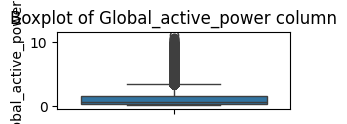

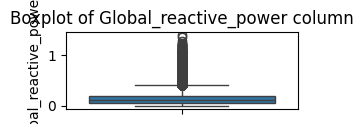

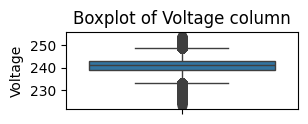

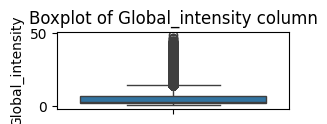

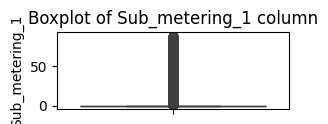

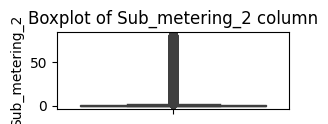

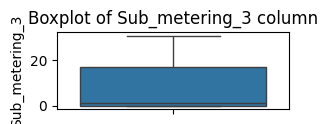

In [83]:
for i in numerical_cols:
    plt.figure(figsize=(3, 1))
    sns.boxplot(data=df[i])
    plt.title(f"Boxplot of {i} column")
    plt.show()

In [84]:
# detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outlier_df = []
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_df.append({'col' : col, 'outliers_count' : len(outliers)})
        
pd.DataFrame(outlier_df)

,col,outliers_count
0,Global_active_power,94907
1,Global_reactive_power,40420
2,Voltage,51067
3,Global_intensity,100961
4,Sub_metering_1,169105
5,Sub_metering_2,77151
6,Sub_metering_3,0


In [85]:
# Function to calculate Z-score bounds and outlier counts
def detect_outliers_zscore(df, columns, threshold=3):
    outlier_stats = []
    for col in columns:
        z_scores = zscore(df[col])
        outliers = (abs(z_scores) > threshold).sum()
        outlier_stats.append({'col': col,'outliers_count': outliers})
    
    return pd.DataFrame(outlier_stats)

outlier_zscore_stats = detect_outliers_zscore(df, numerical_cols)
outlier_zscore_stats

,col,outliers_count
0,Global_active_power,36160
1,Global_reactive_power,24480
2,Voltage,12759
3,Global_intensity,37434
4,Sub_metering_1,56097
5,Sub_metering_2,50993
6,Sub_metering_3,0


In [86]:
# Conclusion from Step 6: The dataset contains outliers. Outliers are detected using Boxplot, IQR and Z-score methods. 
# Eventhough the dataset contains outliers, we are not removing the outliers as the dataset is time series data.

##### Step 7 --> Skew & Kurtosis

In [87]:
# detect outliers using skew/kurtosis method
for column in numerical_cols:
    if df[column].skew() < 0.5 and df[column].skew() > -0.5 and df[column].kurtosis() < 3 and df[column].kurtosis() > -3:
        continue
    print(f'Skewness of the {column} : ',df[column].skew())
    print(f'Kurtosis of the {column} : ',df[column].kurtosis())
    print("-----------------------------------------")

Skewness of the Global_active_power :  1.7862333920915965
Kurtosis of the Global_active_power :  4.218685087072209
-----------------------------------------
Skewness of the Global_reactive_power :  1.2619141974704149
Kurtosis of the Global_reactive_power :  2.6056327677496105
-----------------------------------------
Skewness of the Global_intensity :  1.8490999040716398
Kurtosis of the Global_intensity :  4.601242858337602
-----------------------------------------
Skewness of the Sub_metering_1 :  5.944541281563981
Kurtosis of the Sub_metering_1 :  35.642992681719356
-----------------------------------------
Skewness of the Sub_metering_2 :  7.0905532303433985
Kurtosis of the Sub_metering_2 :  57.90734360431289
-----------------------------------------
Skewness of the Sub_metering_3 :  0.7246883225039495
Kurtosis of the Sub_metering_3 :  -1.2821975312784255
-----------------------------------------


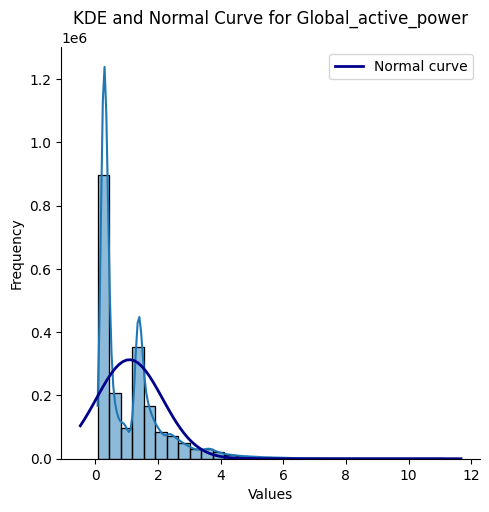

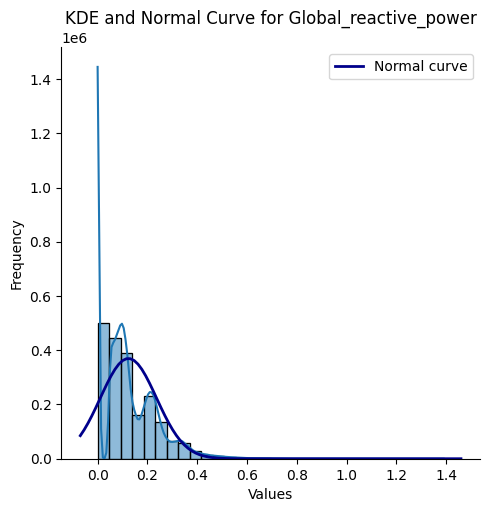

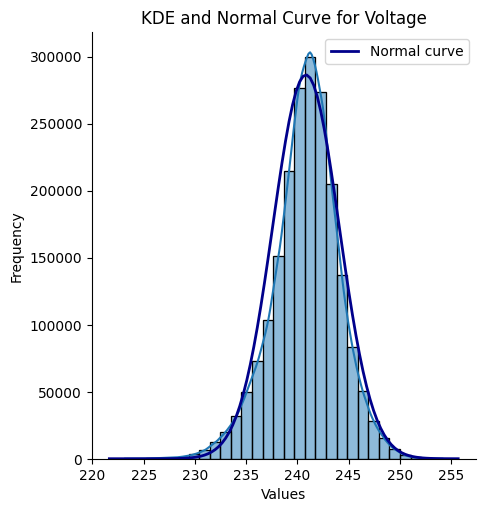

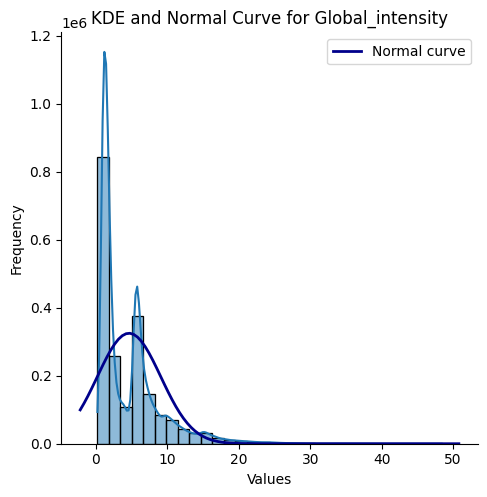

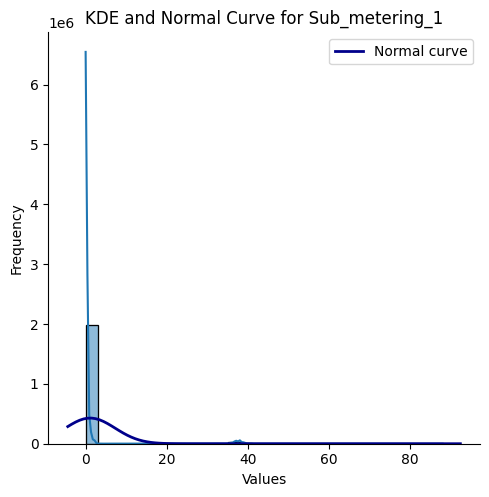

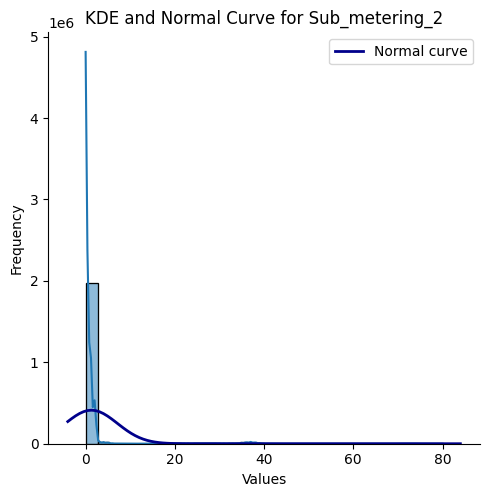

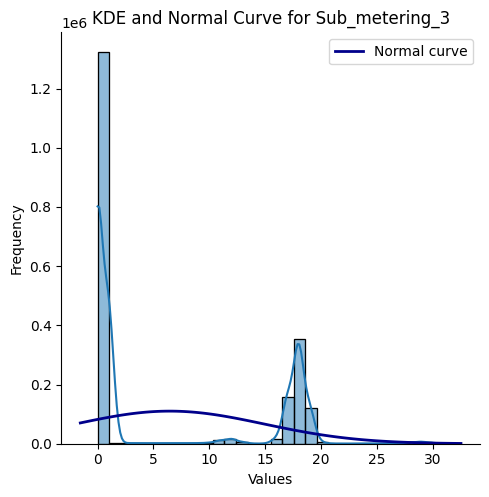

In [88]:
for col in numerical_cols:
    sns.displot(df[col], kde=True, bins=30)
    mu, sigma = norm.fit(df[col])
    xmin, xmax = plt.xlim()  
    x = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(x, mu, sigma)  
 
    plt.plot(x, pdf * len(df[col]) * (xmax - xmin) / 30, color='darkblue', lw=2, label='Normal curve')
    plt.title(f'KDE and Normal Curve for {col}')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
 

##### Step - 8 --> Feature Engineering

In [89]:
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month
df['WeekOfYear'] = df['Datetime'].dt.isocalendar().week
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x > 5 else 0)


In [90]:
# peak hours (e.g., 6 AM - 10 AM, 6 PM - 10 PM)
peak_hours = list(range(6,11)) + list(range(18,24))
df['IsPeakHour'] = df['Hour'].apply(lambda x: 1 if x in peak_hours else 0)

In [91]:
df['Daily_Consumption'] = df.groupby(df['Datetime'].dt.date)['Global_active_power'].transform(lambda x: x.sum() * (1/60))

In [94]:
# Compute total sub-metered energy
df['Unmetered_Energy'] = df['Global_active_power'] * 1000 / 60 - df['Sub_metering_1'] - df['Sub_metering_2'] + df['Sub_metering_3']

In [ ]:
df['Short_Term_Avg_Power'] = df['Global_active_power'].rolling(window=10, min_periods=1).mean()
df['Hourly_Avg_Power'] = df['Global_active_power'].rolling(window=60, min_periods=1).mean()
df['Daily_Avg_Power'] = df['Global_active_power'].rolling(window=1440, min_periods=1).mean()


df['Power_Deviation_10min'] = df['Global_active_power'] - df['Short_Term_Avg_Power']
df['Power_Anomaly_Flag'] = (abs(df['Power_Deviation_10min']) > 1.5 * df['Hourly_Avg_Power']).astype(int)

In [ ]:
def get_seasons(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
df['Season'] = df['Month'].apply(get_seasons)

In [ ]:
def get_time_of_day(hour):
    if hour in range(5, 12):
        return 'Morning'
    elif hour in range(12, 17):
        return 'Afternoon'
    elif hour in range(17, 20):
        return 'Evening'
    else:
        return 'Night'
    
df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)

In [96]:
df['Fourier_day_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Fourier_day_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Fourier_week_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['Fourier_day_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

df['Fourier_month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Fourier_month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

In [100]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime', 'Hour', 'DayOfWeek', 'Month',
       'WeekOfYear', 'IsWeekend', 'IsPeakHour', 'Daily_Consumption',
       'Unmetered_Energy', 'Fourier_day_sin', 'Fourier_day_cos',
       'Fourier_week_sin', 'Fourier_month_sin', 'Fourier_month_cos'],
      dtype='object')

In [ ]:
# Conclusion from Step 8: Created new features like ['Hour', 'DayOfWeek', 'Month','WeekOfYear', 'IsWeekend', 'IsPeakHour', 'Daily_Consumption', 'Unmetered_Energy', 'Season', 'TimeOfDay', 'Fourier_day_sin', 'Fourier_day_cos','Fourier_week_sin', 'Fourier_month_sin', 'Fourier_month_cos'] from the existing features.

##### Step 8 --> EDA 

In [108]:
figures = []

# Time-series line plot of daily consumption
fig = px.line(df, x='Datetime', y='Daily_Consumption', title='Daily Energy Consumption Over Time')
figures.append(fig)

# Histogram for Global Active Power Distribution
fig = px.histogram(df, x='Global_active_power', nbins=50, title='Distribution of Global Active Power')
figures.append(fig)